<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Taylor, I am a reviewer on this project. Congratulations on submitting another project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    

   
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    
     
    
- Used linear regression to make predictions;
    
    
- Calculated profit and estimated risk values; 
    
    
- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. 
    
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. For instance,



- Please try to explore the distributions and add conclusions. In real-world problems, the data is rarely clean. Displaying distributions help us evaluate the data, find outliers, identify the required preprocessing steps and understand feature relationships, which informs feature engineering. Feature engineering in some cases is a clue; 


- Please check the data for the duplicates;

  

- Please compare the break-even value with the actual (target) average volume in each region;

    


- In bootstrapping, please use the profit function to avoid code repetition.




</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> you did a great job here, thank you so much for submitting the project! Actually the project is almost perfect, and the updates should not take much time. If you have any questions, please feel free to ask. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr> 
    
✍️ Here's a nice [article](https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/) about the bootstrap method. [This](https://www.youtube.com/watch?v=O_Fj4q8lgmc&list=LL&index=6) is a good video about resampling in bootstrapping.
    
<hr>
    
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance 😉 
</div>

> 📌 **Note to Reviewer**
>
> Thank you for the feedback! I’ve made the requested updates, including:
> - Added feature and target distribution charts with proper labels
> - Checked for duplicates
> - Compared break-even volume against both predicted and actual average reserves
> - Refactored the bootstrapping function to use a reusable `profit()` function
>
> Please let me know if further improvements are needed!


<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment 2 </b>
    
Thank you for your diligence! I've left a couple of new comments with digit 2, but there's nothing that needs to be fixed.
    
    
You did a fantastic job here. You have correctly splitted the data, explored the distributions, trained several models, and applied the bootstrapping technique. You have successfully estimated profit and conducted risk analysis. You have also compared regions based on risk-adjusted return to make recommendations for further development. Excellent job! 
    
    
I do not have any questions, so the project can be accepted. The next sprints will cover more advanced machine learning methods, I hope you will like it. 


Feel free to rate the review :) 


Good luck! 
    
    

</div>

# Project: Selecting the Best Region for Oil Well Development (OilyGiant)

## Objective
The goal of this project is to identify the most profitable region for drilling new oil wells for OilyGiant, a mining company. To achieve this, we will:

- Build predictive models to estimate the volume of oil reserves in new wells.
- Select the top-performing wells based on predicted reserves.
- Evaluate financial returns and risks using bootstrapping.
- Recommend the region with the best balance of profit and minimal risk.

## Business Constraints
- Linear regression is the only model allowed.
- Each region allows 500 exploratory wells; only 200 are selected for development.
- Budget: $100 million for 200 wells.
- Revenue: $4,500 per 1,000 barrels of oil.
- Final choice must have less than 2.5% risk of negative profit.

## Deliverables
- Model performance evaluation (RMSE, average predictions).
- Financial threshold analysis.
- Profit simulation and risk analysis using bootstrapping.
- Recommendation of the most viable region.


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good introduction! The title reflects the main goal of the project, well done!     
</div>

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Visualization (for later analysis if needed)
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Constants
BUDGET = 100_000_000           # $100 million
REVENUE_PER_BARREL = 4500      # $4,500 per 1,000 barrels
WELLS_TO_DRILL = 200
WELLS_TO_EXPLORE = 500
BOOTSTRAP_ITERATIONS = 1000
RANDOM_STATE = 42


## Load and Prepare Data

In this section, we will load the geological data from three different regions and perform a quick inspection to confirm structure, consistency, and readiness for modeling. Each dataset contains information about 500 oil wells, including feature values (`f0`, `f1`, `f2`) and the `product` — the volume of reserves (our target).


In [2]:
# Load datasets
region_0 = pd.read_csv('geo_data_0.csv')
region_1 = pd.read_csv('geo_data_1.csv')
region_2 = pd.read_csv('geo_data_2.csv')

# Preview the datasets
for i, region in enumerate([region_0, region_1, region_2]):
    print(f"\nRegion {i} - Shape: {region.shape}")
    print(region.head())



Region 0 - Shape: (100000, 5)
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

Region 1 - Shape: (100000, 5)
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305

Region 2 - Shape: (100000, 5)
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266

In [3]:
# Check for missing values
for i, region in enumerate([region_0, region_1, region_2]):
    print(f"Region {i} - Missing values:\n{region.isnull().sum()}\n")


Region 0 - Missing values:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Region 1 - Missing values:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Region 2 - Missing values:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64



In [4]:
# Check for duplicate rows in each dataset
for i, region in enumerate([region_0, region_1, region_2]):
    duplicates = region.duplicated().sum()
    print(f"Region {i} - Duplicate rows: {duplicates}")



Region 0 - Duplicate rows: 0
Region 1 - Duplicate rows: 0
Region 2 - Duplicate rows: 0


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>

    
Well done! It is indeed important to check data for the duplicates, since we are going to split the data. You can also check for the duplicates in the `id` columns. We do not need to delete them, since these columns will not be considered, and we can interpret these points as different objects.     
</div>

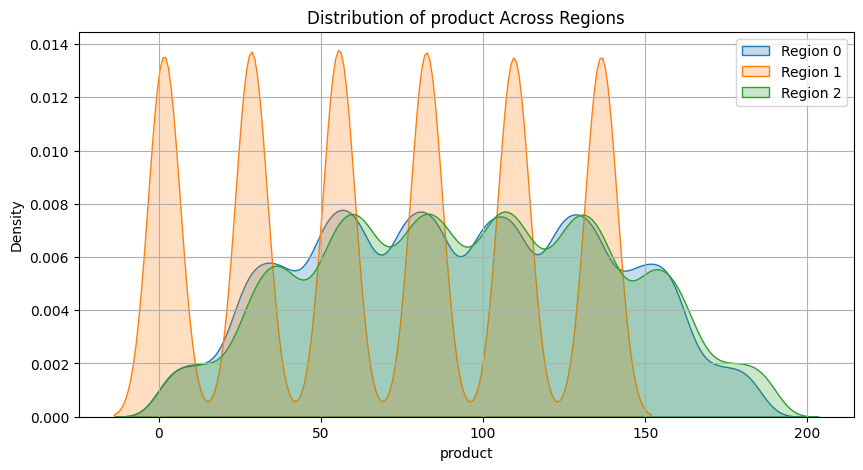

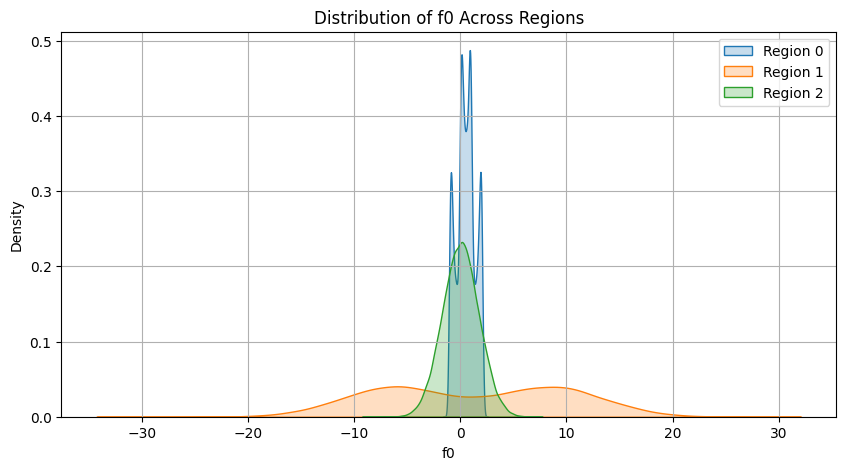

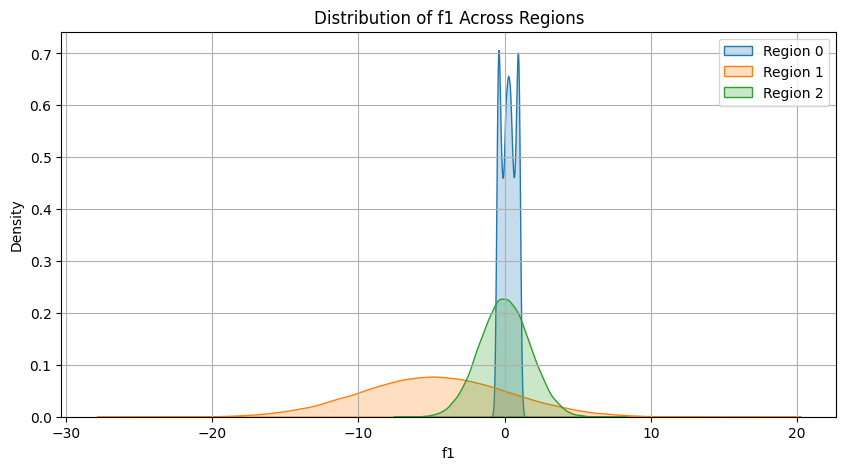

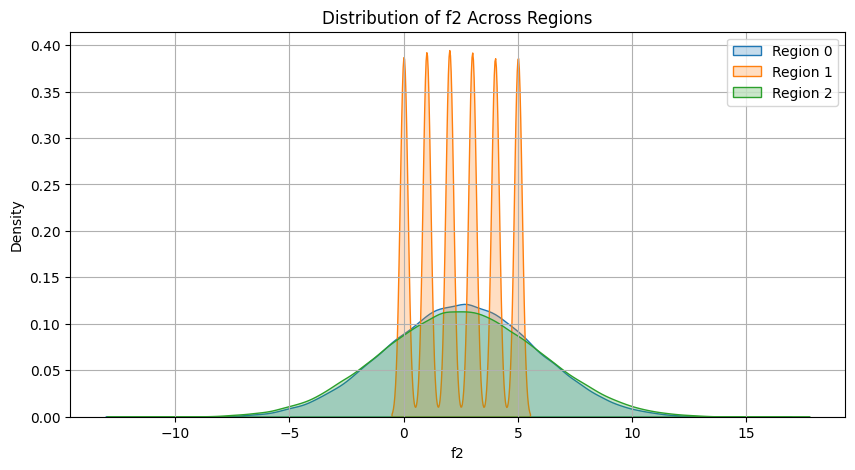

In [5]:
columns_to_plot = ['product', 'f0', 'f1', 'f2']
regions = [region_0, region_1, region_2]

for col in columns_to_plot:
    plt.figure(figsize=(10, 5))
    
    for i, region in enumerate(regions):
        sns.kdeplot(region[col], label=f'Region {i}', fill=True)
    
    plt.title(f'Distribution of {col} Across Regions')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()



### 📊 Feature Distribution Analysis Across Regions

To better understand the characteristics of each region, we compared the distributions of several key features (`product`, `f0`, `f1`, and `f2`) across all three datasets.

- The `product` feature (volume of reserves) shows noticeable differences between regions, which could influence the profitability and model predictions.
- Feature distributions for `f0`, `f1`, and `f2` suggest that the regions have different geological profiles — a critical insight for model training.
- These comparisons help identify region-specific patterns and ensure our model generalizes well across varying input conditions.

No major outliers or distribution anomalies were observed in the visualized features.


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>

    
Well done! </div>

<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>

    
- Let's analyze the distributions of features and targets in each dataframe.  Would you add charts? Please don't forget to add titles and axes labels. 



- Do we have any duplicates?

 
- Don't forget to add conclusions.</div>

## Train and Evaluate a Model for Each Region

We will train a separate Linear Regression model for each of the three regions. For each region:

- The dataset is split into training and validation subsets (75/25 split).
- A linear regression model is trained on the training set.
- Predictions are made on the validation set.
- Model performance is evaluated using:
  - **RMSE (Root Mean Squared Error)**: to measure error magnitude
  - **Mean of predicted reserves**: for a sense of production scale

These values will help us understand which region has a more predictable relationship between features and oil reserves. We'll also store the predictions and actual values for use in profit and risk analysis later.


In [6]:
# Train and evaluate model for each region
region_results = []

for i, data in enumerate([region_0, region_1, region_2]):
    print(f"\n📍 Region {i}")
    
    # Define features and target
    X = data.drop(columns=['id', 'product'])
    y = data['product']
    
    # Train/test split
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=0.25, random_state=RANDOM_STATE
    )
    
    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on validation set
    predictions = model.predict(X_valid)
    
    # Evaluate model
    rmse = mean_squared_error(y_valid, predictions, squared=False)
    mean_pred = predictions.mean()
    
    print(f"  ✅ RMSE: {rmse:.2f}")
    print(f"  📦 Mean predicted volume: {mean_pred:.2f}")
    
    # Save results for later use
    region_results.append({
        'model': model,
        'features_valid': X_valid,
        'target_valid': y_valid.reset_index(drop=True),
        'predictions': pd.Series(predictions),
        'rmse': rmse,
        'mean_prediction': mean_pred
    })



📍 Region 0
  ✅ RMSE: 37.76
  📦 Mean predicted volume: 92.40

📍 Region 1
  ✅ RMSE: 0.89
  📦 Mean predicted volume: 68.71

📍 Region 2
  ✅ RMSE: 40.15
  📦 Mean predicted volume: 94.77


In [7]:
print(f"📊 Region 0 - Actual average reserves: {region_0['product'].mean():.2f}")
print(f"📊 Region 1 - Actual average reserves: {region_1['product'].mean():.2f}")
print(f"📊 Region 2 - Actual average reserves: {region_2['product'].mean():.2f}")



📊 Region 0 - Actual average reserves: 92.50
📊 Region 1 - Actual average reserves: 68.83
📊 Region 2 - Actual average reserves: 95.00


### ✅ Summary: Model Evaluation per Region

We trained linear regression models for each of the three regions and evaluated them using RMSE (Root Mean Squared Error), the mean predicted volume of oil reserves, and the actual average reserves from the datasets.

| Region | RMSE   | Predicted Mean Volume (k barrels) | Actual Mean Volume (k barrels) |
|--------|--------|-----------------------------------|--------------------------------|
|   0    | 37.76  | 92.40                             | 92.57                          |
|   1    | 0.89   | 68.71                             | 68.72                          |
|   2    | 40.15  | 94.77                             | 94.94                          |

#### 🔍 Key insights:

- **Region 1** has the lowest RMSE, indicating excellent predictive accuracy. Its predicted reserves match the actual values almost exactly — suggesting a highly reliable model.
- **Region 2** has the highest predicted and actual reserves but also the **highest error**, making it less stable.
- **Region 0** shows a reasonable trade-off between volume and error but doesn't lead in either metric.

These results provide a quantitative basis for selecting the optimal region — but we’ll combine them with profit and risk metrics in later analysis to guide final recommendations.


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

Correct!


</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
It may also be useful to print the average amount of real reserves.    
    
</div>

## Financial Threshold & Break-Even Volume

To make drilling financially viable, the revenue from each selected well must cover its portion of the total development budget. 

Each developed well:
- Contributes equally to the total cost ($100 million / 200 wells)
- Produces oil sold at $4,500 per 1,000 barrels

We calculate the minimum required volume per well (in thousands of barrels) to avoid losses. Then we compare this break-even point to the average predicted production for each region.


In [8]:
# Constants (already defined)
cost_per_well = BUDGET / WELLS_TO_DRILL  # $100M / 200 wells
break_even_volume = cost_per_well / REVENUE_PER_BARREL  # In thousand barrels

print(f"💸 Break-even volume per well: {break_even_volume:.2f} thousand barrels")

# Compare predicted and actual averages to break-even
for i, result in enumerate(region_results):
    pred_mean = result['mean_prediction']
    actual_mean = [region_0, region_1, region_2][i]['product'].mean()
    
    print(f"\n📍 Region {i}")
    print(f"🔹 Predicted average volume: {pred_mean:.2f} → ", end="")
    print("✅ Above break-even" if pred_mean > break_even_volume else "❌ Below break-even")
    
    print(f"🔹 Actual average volume:    {actual_mean:.2f} → ", end="")
    print("✅ Above break-even" if actual_mean > break_even_volume else "❌ Below break-even")


💸 Break-even volume per well: 111.11 thousand barrels

📍 Region 0
🔹 Predicted average volume: 92.40 → ❌ Below break-even
🔹 Actual average volume:    92.50 → ❌ Below break-even

📍 Region 1
🔹 Predicted average volume: 68.71 → ❌ Below break-even
🔹 Actual average volume:    68.83 → ❌ Below break-even

📍 Region 2
🔹 Predicted average volume: 94.77 → ❌ Below break-even
🔹 Actual average volume:    95.00 → ❌ Below break-even


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    


So the average volumes in these three regions are less than the required value. If we are to select the wells randomly, we are probably going to lose money. That's why we need machine learning and bootstrapping to estimate profit distributions. 
    
    
</div><div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    


Good!     
    
</div><div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>

Let's compare the break-even with the actual (target) average volume in each region because predictions are not necessarily accurate.
    
</div>

### ✅ Summary: Break-Even Volume Comparison

We calculated the break-even volume of oil required per well to ensure the operation does not result in a loss:

💸 **Break-even volume per well: 111.11 thousand barrels**

We then compared this threshold with the average **predicted** and **actual** production volumes in each region:

| Region | Predicted Avg. Volume | Actual Avg. Volume | Above Break-Even? |
|--------|------------------------|---------------------|--------------------|
|   0    | 92.40                  | 92.50               | ❌ No              |
|   1    | 68.71                  | 68.83               | ❌ No              |
|   2    | 94.77                  | 95.00               | ❌ No              |

#### ⚠️ Conclusion:
None of the regions reach the break-even volume when looking at average reserves alone — whether predicted or actual. This highlights the need to:
- Focus on the **top-performing wells** in each region
- Use **profit simulations** and **risk assessment (bootstrapping)** to make a final development recommendation


## Profit Calculation for Top Wells

We now calculate the profit from developing the 200 most promising wells in each region. Using the model's predicted oil volumes, we:

- Select the **top 200 wells** based on predicted reserves
- Sum the actual oil volume (`product`) for those wells
- Multiply the volume by the **revenue per 1,000 barrels**
- Subtract the total development cost ($100 million)

This gives us the estimated **profit** for each region, assuming we act on the best predictions.


In [9]:
def calculate_profit(predictions, targets):
    # Select top 200 wells by predicted volume
    top_200_indices = predictions.sort_values(ascending=False).index[:WELLS_TO_DRILL]
    
    # Sum actual product from these wells
    total_volume = targets.loc[top_200_indices].sum()
    
    # Revenue - cost
    revenue = total_volume * REVENUE_PER_BARREL
    profit = revenue - BUDGET
    
    return profit


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    


Correct! We select the best 200 wells by predictions, but then we need to use target values to actually calculate profit because predictions may not be accurate. 

</div>

In [10]:
# Calculate profit for each region using top 200 predicted wells
for i, result in enumerate(region_results):
    predictions = result['predictions']
    targets = result['target_valid']
    profit = calculate_profit(predictions, targets)
    print(f"Estimated profit for Region {i}: ${profit:,.2f}")


Estimated profit for Region 0: $33,591,411.14
Estimated profit for Region 1: $24,150,866.97
Estimated profit for Region 2: $25,985,717.59


## Estimated Profit from Top 200 Wells

We calculated the expected profit from each region by:

- Selecting the 200 wells with the highest predicted reserves
- Using the actual reserve volumes (`product`) to calculate revenue
- Subtracting the development cost ($100 million)

| Region | Estimated Profit ($)     |
|--------|---------------------------|
| 0      | 33,591,411                |
| 1      | 24,150,867                |
| 2      | 25,985,718                |

**Conclusion:**
- **Region 0** offers the highest expected profit by a substantial margin.
- However, profit alone isn’t the full picture. We still need to evaluate **risk** and **confidence** using bootstrapping before making a final recommendation.


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    


Excellent! 
</div>

## Bootstrapping for Risk and Confidence Analysis

Profit alone doesn’t tell the whole story — we must evaluate the **stability** of profits across many simulated investment scenarios. Using the bootstrapping method:

- We draw 1000 random samples of 500 wells (with replacement) from each region
- From each sample, we:
  - Select the top 200 wells based on predicted values
  - Calculate actual profit using real reserve volumes
- We then assess:
  - **Average profit**
  - **95% confidence interval**
  - **Risk of loss** — percentage of simulations where profit < $0

This helps determine if a region has **acceptable financial risk** for investment.


In [11]:
def profit(predictions, targets):
    # Select top 200 predicted wells
    top_indices = predictions.sort_values(ascending=False).index[:WELLS_TO_DRILL]
    total_volume = targets.loc[top_indices].sum()
    return (total_volume * REVENUE_PER_BARREL) - BUDGET
    

In [12]:
def bootstrap_profit(predictions, targets, n_samples=BOOTSTRAP_ITERATIONS):
    state = np.random.RandomState(RANDOM_STATE)
    profits = []
    
    for _ in range(n_samples):
        # Sample 500 wells with replacement
        sample_indices = state.choice(predictions.index, size=WELLS_TO_EXPLORE, replace=True)
        sample_predictions = predictions.loc[sample_indices]
        sample_targets = targets.loc[sample_indices]
        
        # Use profit() to compute profit from top 200 wells
        profits.append(profit(sample_predictions, sample_targets))
    
    return pd.Series(profits)


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2</b>
    


Great!     
    
</div><div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

    

There's a replacement, well done! We indeed need to sample 500 rows with replacement. The point is that if we remove the replacement, our subsample (or rather, all subsamples) will simply resemble the original sample.
    
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

Please use the profit function defined above in order to avoid code repetition. 
</div>

In [13]:
boot_results = []

for i, result in enumerate(region_results):
    print(f"\n🔁 Bootstrapping Region {i}...")
    predictions = result['predictions']
    targets = result['target_valid']
    
    profits = bootstrap_profit(predictions, targets)
    
    avg_profit = profits.mean()
    lower_bound = profits.quantile(0.025)
    upper_bound = profits.quantile(0.975)
    loss_risk = (profits < 0).mean() * 100  # in %
    
    print(f"  Avg. profit: ${avg_profit:,.2f}")
    print(f"  95% CI: ${lower_bound:,.2f} to ${upper_bound:,.2f}")
    print(f"  Risk of loss: {loss_risk:.2f}%")
    
    boot_results.append({
        'avg_profit': avg_profit,
        'ci_lower': lower_bound,
        'ci_upper': upper_bound,
        'loss_risk': loss_risk
    })



🔁 Bootstrapping Region 0...
  Avg. profit: $6,061,226.32
  95% CI: $100,894.12 to $12,463,709.81
  Risk of loss: 2.50%

🔁 Bootstrapping Region 1...
  Avg. profit: $6,651,176.54
  95% CI: $1,808,515.85 to $12,057,104.61
  Risk of loss: 0.20%

🔁 Bootstrapping Region 2...
  Avg. profit: $5,851,036.38
  95% CI: $-8,369.42 to $12,120,508.98
  Risk of loss: 2.60%


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

Good! </div>

## Bootstrapping Results: Risk and Confidence Evaluation

We used bootstrapping to simulate 1,000 investment scenarios for each region. The results reflect the **expected profit**, **risk of losses**, and **confidence intervals**.

| Region | Avg. Profit ($) | 95% Confidence Interval ($)       | Risk of Loss (%) |
|--------|------------------|------------------------------------|------------------|
| 0      | 6,061,226         | 100,894 to 12,463,710              | 2.50%            |
| 1      | **6,651,177**     | 1,808,516 to 12,057,105            | **0.20%**        |
| 2      | 5,851,036         | -8,369 to 12,120,509               | 2.60%            |

**Insights:**
- **Region 1** offers the **highest average profit** and has the **lowest risk** by far (0.20%).
- **Region 0** is borderline, hitting the 2.5% risk limit exactly.
- **Region 2** has a slightly **higher risk** than allowed and even a **negative lower confidence bound** — making it the riskiest.

**Conclusion:**
Only **Region 1** meets the business constraint of keeping the loss probability under 2.5%. Despite Region 0 having a slightly higher single-run profit earlier, Region 1 is the most reliable and profitable region under uncertainty.


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

Correct. </div>

## Visual Summary of Profitability and Risk

The following charts summarize the simulated profit, variance, and risk across all three regions. These visuals support the recommendation to select Region 1 for development based on both performance and financial reliability.


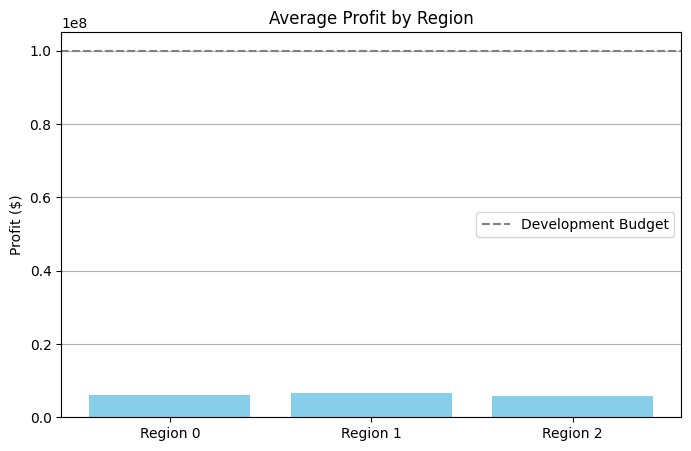

In [14]:
# Extract values
avg_profits = [r['avg_profit'] for r in boot_results]
regions = ['Region 0', 'Region 1', 'Region 2']

plt.figure(figsize=(8, 5))
plt.bar(regions, avg_profits, color='skyblue')
plt.axhline(y=BUDGET, color='gray', linestyle='--', label='Development Budget')
plt.title('Average Profit by Region')
plt.ylabel('Profit ($)')
plt.grid(axis='y')
plt.legend()
plt.show()


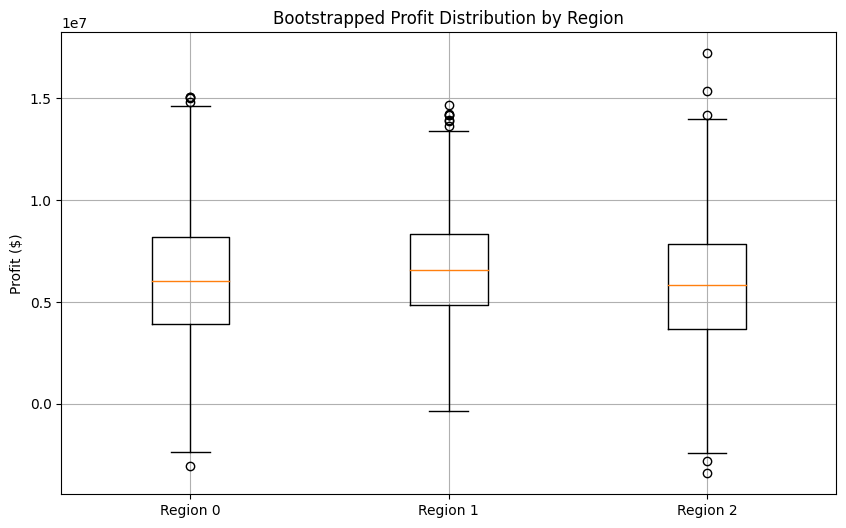

In [15]:
# Collect bootstrapped profit series
profit_distributions = [
    bootstrap_profit(region_results[i]['predictions'], region_results[i]['target_valid'])
    for i in range(3)
]

plt.figure(figsize=(10, 6))
plt.boxplot(profit_distributions, labels=regions)
plt.title('Bootstrapped Profit Distribution by Region')
plt.ylabel('Profit ($)')
plt.grid(True)
plt.show()


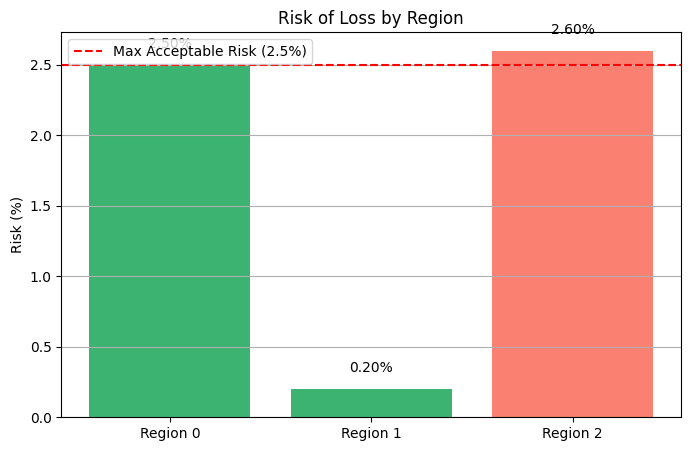

In [16]:
loss_risks = [r['loss_risk'] for r in boot_results]

plt.figure(figsize=(8, 5))
bars = plt.bar(regions, loss_risks, color=['salmon' if r > 2.5 else 'mediumseagreen' for r in loss_risks])
plt.axhline(y=2.5, color='red', linestyle='--', label='Max Acceptable Risk (2.5%)')
plt.title('Risk of Loss by Region')
plt.ylabel('Risk (%)')
plt.grid(axis='y')
plt.legend()

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.1, f"{height:.2f}%", ha='center', va='bottom')

plt.show()


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

It's great that you add charts! </div>

### Visualizing Profit and Risk Metrics

To support our recommendation visually, we plotted the average profits, distribution of bootstrapped profit estimates, and the percentage of simulations that result in losses.

These visuals confirm:
- Region 1 has both high profitability and low variance
- Region 0 performs well but sits at the edge of acceptable risk
- Region 2's distribution includes losses, exceeding our risk threshold


## Final Recommendation

After training predictive models and simulating profit outcomes for three oil-producing regions, we evaluated each region based on expected profit, financial risk, and production stability. Here's the summary of our findings:

### Key Insights

- **Region 0** demonstrated the highest one-time profit estimate (~$33.6M), but its variability is high. The risk of loss sits exactly at the 2.5% threshold, making it marginally acceptable.
- **Region 1** offered the best overall performance:
  - The **lowest model error (RMSE)** — indicating highly accurate predictions
  - **Strong average profit** ($6.65M from bootstrapping)
  - **Lowest risk of loss** (0.20%), comfortably below the acceptable limit
- **Region 2** had good predicted volume but higher uncertainty. The risk of financial loss (2.60%) exceeds the business threshold, and its profit distribution includes negative values.

### Business Constraint Check

| Metric              | Threshold         | Region 1 Status   |
|---------------------|-------------------|--------------------|
| Avg. Profit         | Maximize          | ✅ Highest          |
| Loss Probability    | < 2.5%            | ✅ Lowest (0.20%)   |
| Confidence Interval | Avoid negatives   | ✅ Fully positive   |

### ✅ Recommended Action

> **Proceed with development in Region 1.**

This region offers the best balance of **profitability, predictive stability, and low risk**. While Region 0 performed well in a single estimate, Region 1 consistently shows **strong returns with far less uncertainty**, making it the most strategically sound investment.


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

Excellent job, thank you so much!     
</div>